# 2値のirisデータに対して分類モデルを作る

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier


# irisのデータセットを読み出し、2軸を抽出する

In [2]:
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, 2:4]

y = iris.target


# データセットの順序を入れ替える

In [3]:
# shuffle
idx = np.arange(X.shape[0]) #配列の大きさ（行数）を元に数列を作る
np.random.seed(13)          #乱数のシードを固定
np.random.shuffle(idx)      #引数で渡した配列がシャッフルされる
X = X[idx] #データセットの中身をシャッフルする
y = y[idx] #データセットの中身をシャッフルする

# 標準化する

In [4]:
# standardize
mean = X.mean(axis=0) #平均を求める
std = X.std(axis=0)   #標準偏差を求める
X = (X - mean) / std  #標準化 [(値-平均)/標準偏差]


# SGDClassifierによる機械学習

In [5]:
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

# 分類テスト
print(clf.predict([[-0.8,-0.8]]))
print(clf.predict([[0.5,0.5]]))
print(clf.predict([[0.8,0.8]]))

[0]
[1]
[2]


# グラフ描画のための下準備

In [6]:
# 描画範囲を全てメッシュ構造として表現し、全ての点について予測を行う

h = 0.02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 描画範囲の全ての点を予測したラベル配列
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 超平面をグラフに引く

In [8]:
def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    # 座標[xmin, xmax]から、
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


# グラフを描画する

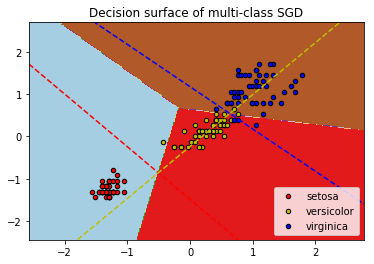

In [9]:
plt.title("Decision surface of multi-class SGD")
colors = "ryb"

# Put the result into a color plot
Z = Z.reshape(xx.shape) #正解の配列Zのサイズを修正？

#xx,yyの座標に対して、ラベルZによる等高線（塗りつぶし）をする(色はPaired)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')


# irisの教師データをプロットする
# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.axis('tight')
plt.legend()

# 
# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()  # 描画範囲の指定
ymin, ymax = plt.ylim()  # 描画範囲の指定
coef = clf.coef_            #偏回帰係数
intercept = clf.intercept_  #切片

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)

plt.show()